<h2>exercice 02: importance sampling, 3D random walk<h2>  

In [1]:
import numpy as np
import matplotlib.pyplot as plt

directory = "exercices/output/dir02-1/"

<h5>ex 02-1: calculate integral of function $\int_{0}^{1}\frac{\pi}{2}\cos(\frac{\pi x}{2})$ <h5>

for the first part, we compute the integral numerically by the "ingenuous method", i.e. picking values of x uniformly distributed in the integration interval and computing the (block) average of the integrand evaluated in those points

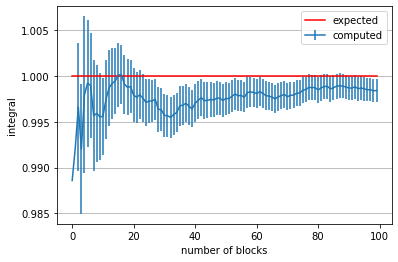

In [2]:
#method 1: sampling with uniform probability distribution
x, Int, error = np.loadtxt(directory + "Uniform", unpack = True)

#actually, integral is analitically computable:
#the expected value of it is 1
expected = np.ones(len(x))

plt.errorbar(x, Int, yerr=error, label='computed')
plt.plot(x, expected, 'r-', label='expected')
plt.xlabel('number of blocks')
plt.ylabel('integral')
plt.grid(True, axis='y', which='both')

plt.legend()
plt.show()


for the importance sampling, we choose the probability density for sampling the x variable value to be $d(x)=2-2x$: 
it is easy to obtain from a uniform one by inversion of cumulate (by $x=1-\sqrt{1-y}$, y a uniform random variable in range $[0,1)$), and it is nonnegative in the interval $[0,1]$:

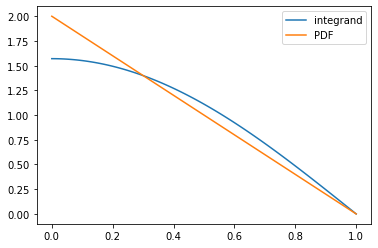

In [3]:
#showing the function to be integrated and pdf used
x = np.linspace(0,1,100)
integrand = np.cos(x * np.pi/2)*np.pi/2
pdf = 2 - 2*x

plt.plot(x, integrand, label="integrand")
plt.plot(x, pdf, label="PDF")

plt.legend()
plt.show()

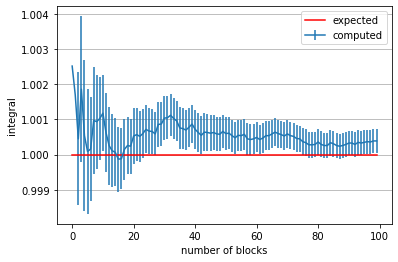

In [4]:
#method 1: sampling with probability distribution d(x) = 2-2x
x, Int, error = np.loadtxt(directory + "Importance", unpack = True)

#actually, integral is analitically computable:
#the expected value of it is 1
expected = np.ones(len(x))

plt.errorbar(x, Int, yerr=error, label='computed')
plt.plot(x, expected, 'r-', label='expected')
plt.xlabel('number of blocks')
plt.ylabel('integral')
plt.grid(True, axis='y', which='both')

plt.legend()
plt.show()


<h5>ex 02-2 : plot mean square displacement after n steps in 3D random walk<h5> 

A discrete random walk is a stocastic process in which a "walker", initially located in the origin, performs 1 step in a random direction at every time (the times of moves are a discrete set). We are interested in two different set-ups: discrete and continuous spatial coordinates. 

In the first experiment, the walker performs steps in a cubic lattice: at each time, it can choose a random direction out the set {x,y,z} and either go forward or go back 1 cell.

In the code, a class "walker3D" is defined. In order to perform a move in 3D cubic lattice, it uses a random number \[0,3) to choose the direction and another one in order to decide whether to step forward or backward:


      void GetLatticeIncrement(){

         int iCoordinate = std::floor(pRnd->Rannyu() * 3);
         int increment = std::round(pRnd->Rannyu()) * 2 - 1;

         switch (iCoordinate){
            case 0:
                 latticeX += increment;
                 break;
            case 1:
                 latticeY += increment;
                 break;
            case 2:
                 latticeZ += increment;
                 break;
            default:
                 throw "invalid random index generated";
                 break;
         }

      }

To perform a move in a continuous 3D space, on the other hand, Walker relies on a class that generates a 3D random versor and updates position accordingly

Actually, in order to be able to compute block means, several random walks (N = 10000) of 100 steps are performed, and they are grouped into 100 blocks of 100 random walks each. More in detail, the walker performs 10000 walks sequentially; since we are intersted in the displacement after n $\in$ {1,2,3...100} steps, after every step the distance from the origin is computed, and its value employed for the calculation the block average of the corresponding quantity. 

After that, we load the data and fit the mean square displacement to a linear function. This way we can display the diffusion coefficient, from $<x^2(t)> = 6Dt$. Finally, we plot the square root of both the calculated mean square displacement and the fitting curve

In [5]:
directory = "exercices/output/dir02-2/"


Case 1: walk on discrete lattice. Each time walker moves to an adiacent cell, picked at random


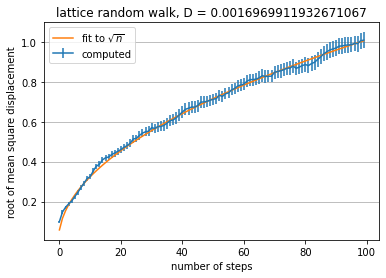

In [14]:
n, sqDisp, sqError = np.loadtxt(directory+"lattice", unpack=True)


#fitting data to linear increase(see Lecture 02)

coefficients = np.polyfit (n, sqDisp, 1, w=sqError)

fitSq = n*coefficients[0] + coefficients[1]

#since we desire to plot the square root of mean square displacement and its uncertainty,
#we must process data accordingly

Disp = np.sqrt(sqDisp)
Error = sqError/(2*Disp) #propagation of error on square root 

fit = np.sqrt(fitSq)


plt.errorbar(n, Disp, yerr=Error, label='computed')
plt.plot(n, fit, label='fit to $\sqrt{n}$')
plt.xlabel('number of steps')
plt.ylabel('root of mean square displacement')
plt.title ("lattice random walk, D = {}".format(coefficients[0]/6.))
plt.grid(True, axis='y', which='both')

plt.legend()
plt.show()




In the second experiment, the walker performs a step in a random direction. At present the length of this step is kept fixed (=1), so that the displacement vector for each move is a versor

The choice of a random direction is obtained through the choice of a random solid angle, that can be done by inversion of cumulate as shown in Lesson 2:

      inline void SortAngle () {

         versor.SetTheta (acos (1 - 2 * pRnd->Rannyu() ));
         versor.SetPhi(pRnd->Rannyu() * 2 * M_PI);
         versor.SetMag(1);
         versor.Print();
      }

    
          void GetContinuousIncrement(){
         angle.SortAngle();
         position += *(angle.GetVersor());
      }


Case 2: walk in continuous space. Each time walker moves by a size 1 step in random direction

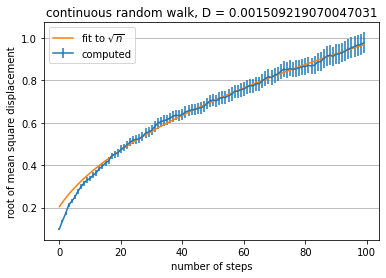

In [15]:

n, sqDisp, sqError = np.loadtxt(directory+"continuous", unpack=True)


#fitting data to linear increase(see Lecture 02)

coefficients = np.polyfit (n, sqDisp, 1, w=sqError)

fitSq = n*coefficients[0] + coefficients[1]

#since we desire to plot the square root of mean square displacement and its uncertainty,
#we must process data accordingly

Disp = np.sqrt(sqDisp)
Error = sqError/(2*Disp) #propagation of error on square root 

fit = np.sqrt(fitSq)


plt.errorbar(n, Disp, yerr=Error, label='computed')
plt.plot(n, fit, label='fit to $\sqrt{n}$')
plt.xlabel('number of steps')
plt.ylabel('root of mean square displacement')
plt.title ("continuous random walk, D = {}".format(coefficients[0]/6.))
plt.grid(True, axis='y', which='both')

plt.legend()
plt.show()




As can be inferred from the plots above, the mean displacement approximately increases as $\sqrt{n}$. Actually, for continuous random walk, the fit gives an offset which shold not appear, since the walker  starts from the origin, as can be seen by the actual plot. This means that in the first steps the diplacement increases faster than $\sqrt{6Dt}$ (or at least that D coefficient changes). This may indicate that the continuous brownian motion with fixed step size and random direction is not the real continuous limit of the lattice one, since the steps lenght does not approach 0; the correct limiting behaviour is that of a Wiener process (see information about that on  [Wikipedia](https://en.wikipedia.org/wiki/Random_walk#Higher_dimensions))